In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#1--> person has heart disease
#0--> person does not have heart disease

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#how to check if i have null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#another method to check if i have null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df['age'].mean()

54.366336633663366

In [12]:
#Left skewed
#Right skewed

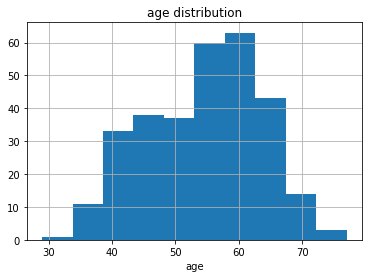

In [13]:
df['age'].hist(grid=True)
plt.title("age distribution")
plt.xlabel("age")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

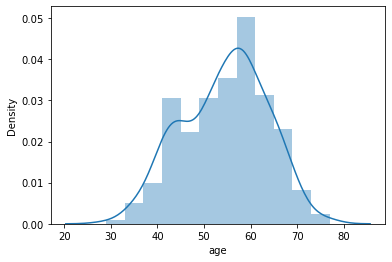

In [14]:
sns.distplot(df['age'])

In [15]:
mean=df["age"].mean()
median=df["age"].median()
mode=df["age"].mode()

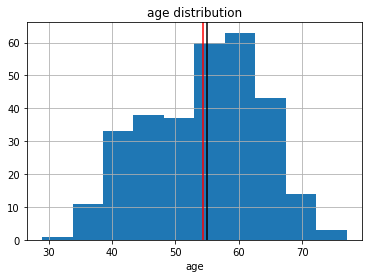

In [16]:
df['age'].hist(grid=True)
plt.axvline(mean,color='red')
plt.axvline(median,color='black')
# plt.axvline(mode(),color = 'g')
plt.title("age distribution")
plt.xlabel("age")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

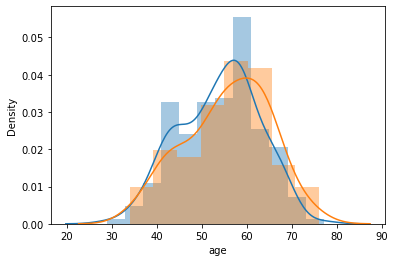

In [17]:
sns.distplot(df[df['sex']==1]['age'],label='male')
sns.distplot(df[df['sex']==0]['age'],label='female')

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#1- male
#0- female

In [20]:
#how many male and female has heart disease

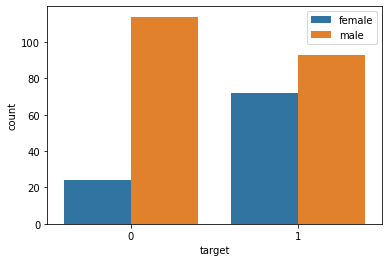

In [21]:
sns.countplot(x='target',hue='sex',data=df)
plt.legend(['female','male'])

In [22]:
#cross check the answer

In [23]:
df[(df.sex==1) & (df.target==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [24]:
#should i perform outliers analysis?
#as dat is little so no

In [25]:
df.shape

(303, 14)

In [26]:
#model building part

In [27]:
# x and y

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
x= df.drop(columns=['target'])
#x=df.iloc[:,:-1]

In [30]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y=df['target']

In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
x.shape

(303, 13)

In [34]:
y.shape

(303,)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [36]:
clf=tree.DecisionTreeClassifier()

In [37]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=clf.predict(x_test)

In [39]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [40]:
y_test

119    1
118    1
173    0
146    1
157    1
      ..
165    0
49     1
251    0
297    0
188    0
Name: target, Length: 91, dtype: int64

In [41]:
confusion_matrix(y_test,y_pred)

array([[23, 17],
       [16, 35]], dtype=int64)

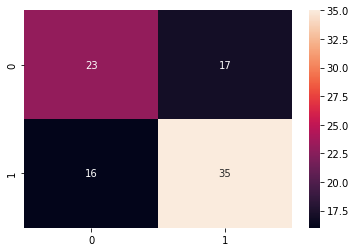

In [42]:
def confusion_m(y_test,y_pred):
    c=confusion_matrix(y_test,y_pred)
    sns.heatmap(c,annot=True)
    plt.show()
confusion_m(y_test,y_pred)

In [43]:
#accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

0.6373626373626373

In [45]:
#how to get  accuracy score with confusion matrix

In [46]:
#(TN+TP)/Total

In [47]:
#precision/specificity
#TP/(TP+FP)

In [48]:
(46)/(46+14)

0.7666666666666667

In [49]:
from sklearn.metrics import *

In [50]:
precision_score(y_test,y_pred)

0.6730769230769231

In [51]:
#recall/sensitivity
#TP/(TP+FN)

In [52]:
recall_score(y_test,y_pred)

0.6862745098039216

In [53]:
#f1_score
#(2*precision*recall)/(precision+recall)

In [54]:
f1_score(y_test,y_pred)

0.6796116504854369

In [55]:
accuracy_score(y_test,y_pred)

0.6373626373626373

In [56]:
# confusion matrix is for checking accuracy but as sometimes the accuracy of accuracy score will
# not be accurate. Hence, we go with f1_score.